In [4]:
import numpy as np
import matplotlib.pyplot as plt
from util import get_data as mnist
from datetime import datetime
%matplotlib inline

In [7]:
def get_simple_xor():
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    Y = np.array([0,1,1,0])
    return X, Y

In [3]:
def get_data():
    w = np.array([-0.5,0.5])
    b = 0.1
    X = np.random.random((300,2))*2 - 1
    Y = np.sign(X.dot(w) + b)
    return X, Y

class Perceptron:
    def fit(self, X, Y, learning_rate = 1.0, epochs = 1000):
        D = X.shape[1]
        self.w = np.random.randn(D)
        self.b = 0
        N = len(Y)
        costs = []
        for epoch in range(epochs):
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y!=Yhat)[0]
            if len(incorrect)==0:
                break
            i = np.random.choice(incorrect)
            self.w += learning_rate*Y[i]*X[i]
            self.b = learning_rate*Y[i]
            c = len(incorrect)/float(N)
            costs.append(c)
        print("Final w: ",self.w, "Final b: ", self.b, "epochs:",(epoch+1),"/",epochs)
        plt.plot(costs)
        plt.show()
        
    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)
    
    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P==Y)

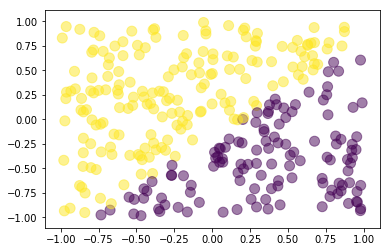

Final w:  [-5.17536446  4.94729654] Final b:  1.0 epochs: 60 / 1000


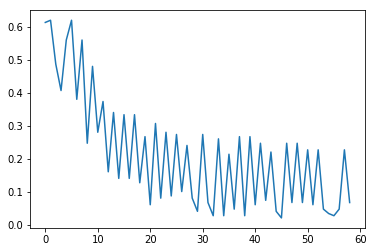

Training time:  0:00:00.481278
Train accuracy:  1.0
Time to compute train accuracy:  0:00:00 Train size:  150
Train accuracy:  0.9866666666666667
Time to compute test accuracy:  0:00:00 Test size:  150


In [6]:
if __name__ == "__main__":
    X, Y = get_data()
    plt.scatter(X[:,0],X[:,1],c=Y,s=100,alpha=0.5)
    plt.show()
    Ntrain = len(Y)//2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    model = Perceptron()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time: ",(datetime.now()- t0))
    
    t0 = datetime.now()
    print("Train accuracy: ",model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy: ", (datetime.now()-t0),"Train size: ",(len(Xtrain)))
    
    t0 = datetime.now()
    print("Train accuracy: ",model.score(Xtest, Ytest))
    print("Time to compute test accuracy: ", (datetime.now()-t0),"Test size: ",(len(Xtest)))

Reading in and transforming data...
Final w:  [ 3.66200104e-01  2.70394847e-01  1.29539748e+00  3.46174057e-01
 -9.53482473e-01 -5.80960359e-01 -5.50815998e-01  4.76973229e-01
  8.89650774e-01 -1.30822208e+00 -6.38482465e-01 -3.27406332e-01
  2.30613273e-01  9.79736504e-02  1.12029807e+00  1.04032574e+00
 -1.48459759e+00  1.31877206e-01  7.09134878e-01 -9.39693938e-01
 -1.50289824e-01 -3.14783329e-01  8.86797620e-01  9.65086246e-01
 -1.40718804e+00 -2.05493290e-02  3.11149901e+00  8.77905888e-01
 -1.96255083e+00  1.72550008e+00  1.65597908e-01 -1.07373581e+00
  1.56685728e+00  4.30996742e-01  6.39524489e-01 -4.41418199e-01
  1.98905585e+00  3.79910372e-01 -1.04756295e+00 -2.17596228e+00
 -5.54648188e-01  9.67785773e-01  2.24117677e+00  1.97481065e+00
 -3.23928079e-01  1.85299819e+00 -5.58315688e-02  6.56802344e-01
 -4.79251737e-01 -1.40592197e+00 -3.67461912e-01  4.11663215e-01
 -5.98051159e-03 -6.07737199e-01  9.50794281e-01 -4.57479030e-01
  6.14363961e-01 -1.31666387e+00 -2.67826350

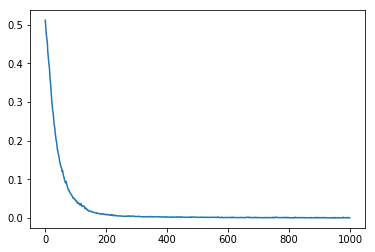

MNIST train accuracy:  0.9991314646664035

XOR Results: 


ValueError: only 2 non-keyword arguments accepted

In [8]:
if __name__ == "__main__":
#     X, Y = get_data()
#     plt.scatter(X[:,0],X[:,1],c=Y,s=100,alpha=0.5)
#     plt.show()
#     Ntrain = len(Y)//2
#     Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
#     Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    model = Perceptron()
#     t0 = datetime.now()
#     model.fit(Xtrain, Ytrain)
#     print("Training time: ",(datetime.now()- t0))
    
#     t0 = datetime.now()
#     print("Train accuracy: ",model.score(Xtrain, Ytrain))
#     print("Time to compute train accuracy: ", (datetime.now()-t0),"Train size: ",(len(Xtrain)))
    
#     t0 = datetime.now()
#     print("Train accuracy: ",model.score(Xtest, Ytest))
#     print("Time to compute test accuracy: ", (datetime.now()-t0),"Test size: ",(len(Xtest)))
    X, Y = mnist()
    idx = np.logical_or(Y==0, Y==1)
    X = X[idx]
    Y = Y[idx]
    Y[Y==0] = -1
    model = Perceptron()
    t0 = datetime.now()
    model.fit(X, Y, learning_rate = 10e-3)
    print("MNIST train accuracy: ", model.score(X, Y))
    print("")
    print("XOR Results: ")
    X, Y = get_simple_xor()
    print("XOR accuracy: ",model.score(X,Y))